# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple and apply a head()

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

apple = pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [3]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type and check the info()

In [4]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [5]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [6]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 6.  Set the date as the index

In [7]:
apple.set_index(['Date'], inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [9]:
apple.index.is_unique

True

In [10]:
apple.index.nunique()

8465

In [11]:
apple.shape

(8465, 6)

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [12]:
apple.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45


In [15]:
apple.sort_index(ascending=True, inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [20]:
apple.loc["1980-12-31"]

Open              34.25
High              34.25
Low               34.13
Close             34.13
Volume       8937600.00
Adj Close          0.53
Name: 1980-12-31 00:00:00, dtype: float64

In [18]:
apple.asfreq(freq="BM")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


In [24]:
apple.loc["1980-12"].mean()

Open         3.048154e+01
High         3.056769e+01
Low          3.044308e+01
Close        3.044308e+01
Volume       2.586252e+07
Adj Close    4.730769e-01
dtype: float64

In [21]:
apple.resample("BM").mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


### Step 10.  What is the difference in days between the first day and the oldest

In [26]:
print(apple.index.max())
print(apple.index.min())

2014-07-08 00:00:00
1980-12-12 00:00:00


In [29]:
(apple.index.max() - apple.index.min()).days

12261

In [30]:
(apple.index.max() - apple.index.min()).days/365.25

33.568788501026695

### Step 11.  How many months in the data we have?

In [37]:
apple['year'] = apple.index.year
apple['month'] = apple.index.month
apple.head()

,Open,High,Low,Close,Volume,Adj Close,year,month
Date,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,1980,12
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980,12
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980,12
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980,12
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980,12


In [42]:
33.55*12

402.59999999999997

In [39]:
apple[['year','month']].drop_duplicates()

,year,month
Date,,
1980-12-12,1980,12
1981-01-02,1981,1
1981-02-02,1981,2
1981-03-02,1981,3
1981-04-01,1981,4
...,...,...
2014-03-03,2014,3
2014-04-01,2014,4
2014-05-01,2014,5


In [46]:
apple.asfreq(freq="BM")

,Open,High,Low,Close,Volume,Adj Close,year,month
Date,,,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53,1980.0,12.0
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44,1981.0,1.0
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41,1981.0,2.0
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38,1981.0,3.0
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44,1981.0,4.0
...,...,...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76,2014.0,2.0
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25,2014.0,3.0
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83,2014.0,4.0


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [48]:
apple['Adj Close']

Date
1980-12-12     0.45
1980-12-15     0.42
1980-12-16     0.39
1980-12-17     0.40
1980-12-18     0.41
              ...  
2014-07-01    93.52
2014-07-02    93.48
2014-07-03    94.03
2014-07-07    95.97
2014-07-08    95.35
Name: Adj Close, Length: 8465, dtype: float64

In [49]:
import matplotlib.pyplot as plt

In [ ]:
apple.resample("BM").mean()

In [57]:
apple.resample("BM").mean()['Adj Close']

Date
1980-12-31     0.473077
1981-01-30     0.493810
1981-02-27     0.411053
1981-03-31     0.387727
1981-04-30     0.423333
                ...    
2014-03-31    75.750000
2014-04-30    76.867143
2014-05-30    86.058571
2014-06-30    91.885714
2014-07-31    94.470000
Freq: BM, Name: Adj Close, Length: 404, dtype: float64

In [71]:
apple.resample("BM").mean()['Adj Close']['1998-12-31']

1.214090909090909

In [70]:
apple['Adj Close']["1998-12-31"]

1.4

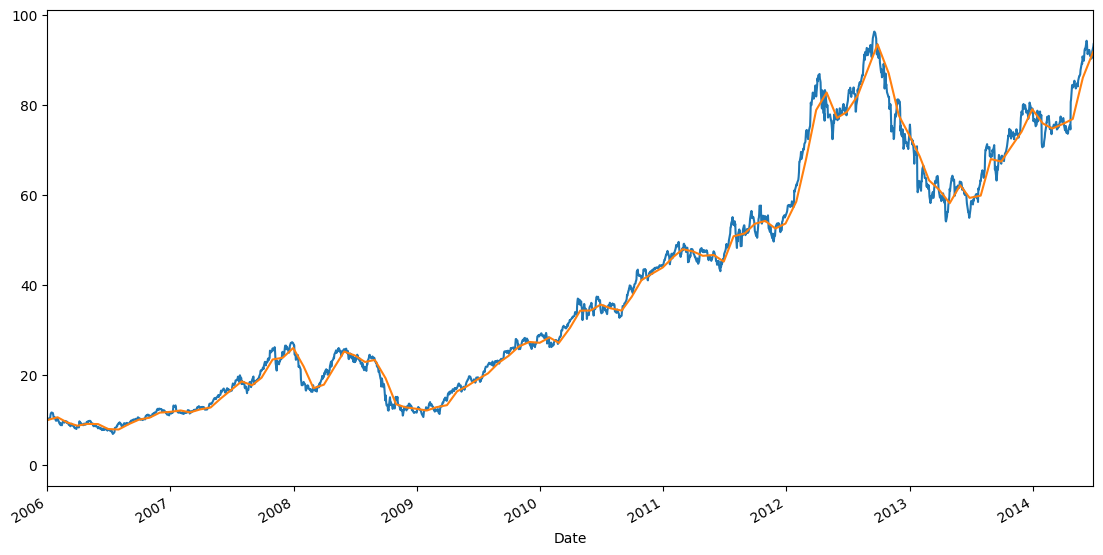

In [76]:
apple['Adj Close'].plot(figsize=(13.5, 7))
apple.resample("BM").mean()['Adj Close'].plot()
plt.xlim("2005-12-31","2014-06-30");